<a href="https://colab.research.google.com/github/ifaul/ifaul.github.io/blob/main/lang_acquire_milestone2_11_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ian Faul, Matthew Vuong

**ESL to ETL: Investigating English proficiency of 2/3 million speakers**

[Link to our website](https://ifaul.github.io/)

[Link to CSV file in Drive](https://drive.google.com/file/d/1LJg6wTE_rl3WXP5lOFRoCuatc1WZjEQm/view?usp=share_link)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

pd.options.mode.copy_on_write = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks


In [3]:
#%%shell
#jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/lang_acquire_milestone1.ipynb

# **Project Goals**

How humans acquire new languages, and why some people are better at it than others, remains a remarkably mysterious question. While it is well-known that children are the most efficient language learners and that language-learning ability declines with age, the specific factors contributing to learning ability (age, gender, country of origin, native language, age at start of second language acquisition, etc.) are more complicated. Here, we plan on using a large dataset of close to 650,000 individuals to disentangle some of these factors and, hopefully, create a model that uses them to estimate language learning trajectory for English. In particular, we are curious to see whether there are any patterns in performance on particular questions across various groups, which would reveal both the underlying linguistic features being tested and those that are compartively more difficult to acquire. This was something not examined by the study associated with this dataset (Hartshorne, J.K. et al, 2018); while our intention isn't to directly replicate their findings, our secondary goal is to determine whether our results converge with their conclusions.

**Collaboration plan**

We (Ian Faul and Matthew Vuong) plan on meeting weekly to discuss the project's direction and implementation, assisting each other when necessary. We will also regularly update a document tracking which steps need to be completed and who they are to be completed by to ensure that work is fairly distributed. Lastly, we will establish a shared Github respository to store our code and our updates to it, allowing us to work remotely.

# **Milestone 1**
### **Some ETL**

We came across this dataset in the "Data Is Plural" archive and downloaded it from [OSF](https://osf.io/pyb8s/wiki/home/). We considered several similar datasets for this project, but this one stood out due to the large number of variables and observations, as well as its being associated with a study whose conclusions we could build on. The original dataset included the following variables:

**id** Unique subject ID

**date** Date at start of experiment

**time** Time at start of experiment

**gender**

**age**

**natlangs** List of subject's native languages

**primelangs** List of subject's primary language now

**dyslexia** Did subject report difficulty with reading?

**psychiatric** Did subject report any psychiatric disorders

**education** highest level of education

**Eng_start** age at start of English learning

**Eng_country_yrs** number of years living in English-speaking country

**house_Eng** subject lives with any native English speakers?

**dictionary** subject reported using a dictionary to complete experiment

**already_participated** Subject reported prior participation in experiment

**countries** countries lived in

**currcountry** country currently lived in

**US_region** regions of USA lived in

**UK_region** regions of UK lived in

**Can_region** regions of Canada lived in

**Ebonics** speaker of Ebonics?

**Ir_region** county of Ireland lived in

**UK_constituency** constituency of UK lived in

**nat_Eng** native speaker of English

**lived_Eng_per** Percentage of years speaking English that lived in English-speaking country.

**Eng_little** values are monoeng (native speaker of English only), bileng (native speaker of English + at least one other lang), lot (immersion learner), little (non-immersion learner).

**q1, q2, etc.** test questions, with subparts

**correct** percentage of critical items correct

**elogit** elogit of correct (not sure what this means)


While this data was originally collected for the primary purpose of finding the critical point in development where grammar-learning ability begins to decline (their finding: 17.4 years), some other specific questions this dataset allows us to consider are (1) Can the test questions be grouped into distinct types, other than the syntactic phenomena explicity included by the original researchers, based on systematic differences in performance among groups? (2) Are there systematic differences in the performance of speakers of native languages other than English? In other words, in which ways do speakers of some languages (or language groups) perform better or worse than others? (3) For people at or above the critical age found in the original study, which variables are associated with the highest overall performance or performance on specific questions/question types?

In the following section, we consider a more workable subset of 10,000 observations, removing variables likely of little relevance, creating new columns to more easily access information separated by commas in individual cells in the original data table, making values within columns consistent and of the correct data type, and lastly, tidying it up.

In [4]:
df_lang = pd.read_csv('data.csv', nrows=100001)
df_lang.head()

<ipython-input-4-a1f1fb77e63c>:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lang = pd.read_csv('data.csv', nrows=100001)


,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,1,1,1,1,1,1,1,1,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,1,1,1,1,1,0,1,1,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,1,1,1,1,1,0,1,1,0.947368,2.800602


In [5]:
# Remove unnecessary variables

df_lang.drop(columns=['Unnamed: 0', 'date', 'time', 'US_region', 'UK_region',
                      'Can_region', 'Ir_region', 'UK_constituency', 'tests'], inplace=True)

In [6]:
# Strip whitespace in all columns

df_lang = df_lang.map(lambda x: x.strip() if isinstance(x, str) else x)

# Remove strange values in some variables

df_lang['education'].unique() # There are some crazy values in here!

def replace_school_with_NAN(entry, allowed_list):
    if entry not in allowed_list:
        return np.nan
    return entry

# These appear to be the original choices offered in the questionnaire.
allowed_list = ['Graduate Degree', 'Undergraduate Degree (3-5 years higher ed)',
                'Some Undergrad (higher ed)', 'High School Degree (12-13 years)',
                'Some Graduate School', 'Didn''t Finish High School (less than 13 years ed)']


df_lang['education'] = df_lang['education'].apply(lambda x: replace_school_with_NAN(x, allowed_list))

In [7]:
# Remove duplicates
df_lang.drop_duplicates(subset=['id'], inplace=True)

In [8]:
# Confirm that all variables are of the correct data type

display(df_lang[['dyslexia', 'psychiatric', 'education', 'Eng_start', 'Eng_country_yrs',
         'house_Eng', 'dictionary', 'already_participated', 'countries', 'currcountry',
         'nat_Eng', 'prime_Eng', 'speaker_cat', 'Eng_little']].dtypes) # Checking to see which data types are incorrect

df_lang[['dyslexia', 'psychiatric','dictionary',
         'already_participated','nat_Eng', 'prime_Eng']] = df_lang[['dyslexia','psychiatric','dictionary', 'already_participated','nat_Eng', 'prime_Eng']].astype('bool')
display(df_lang[['dyslexia', 'psychiatric','dictionary', 'already_participated','nat_Eng', 'prime_Eng']].dtypes) # Converting appropriate colums to bools

# Select all question columns
questions = pd.Series(df_lang.columns).str.startswith('q')
question_cols = df_lang.columns[questions]

# Convert question columns to bools
df_lang[question_cols] = df_lang[question_cols].astype('bool')
display(df_lang[question_cols].dtypes)

,0
dyslexia,int64
psychiatric,int64
education,object
Eng_start,int64
Eng_country_yrs,float64
house_Eng,float64
dictionary,int64
already_participated,int64
countries,object
currcountry,object


,0
dyslexia,bool
psychiatric,bool
dictionary,bool
already_participated,bool
nat_Eng,bool
prime_Eng,bool


,0
q1,bool
q2,bool
q3,bool
q5,bool
q6,bool
...,...
q35_2,bool
q35_4,bool
q35_5,bool
q35_7,bool


In [9]:
# Check for the maximum numbers of natlangs and primelangs

# The number of languages known is equal to the number of commas plus 1.
natlangs = df_lang['natlangs'].str.count(',') + 1
display(natlangs.max())

primelangs = df_lang['primelangs'].str.count(',') + 1
primelangs.max()

7.0

10.0

In [10]:
# Tidying natlangs and primelangs

df_ref_natlang = pd.concat([df_lang['natlangs'].str.split(', ', expand=True),df_lang['id']],axis=1)
df_ref_natlang = pd.melt(df_ref_natlang,id_vars=['id'],value_vars=[0,1,2,3,4]).dropna() # This dropna does drop some observations because some people put no values for natlangs. not sure if we wanted them anyway
df_ref_natlang = df_ref_natlang.drop(columns=['variable']).set_index(['id']).sort_index()

df_ref_primelang = pd.concat([df_lang['primelangs'].str.split(', ', expand=True),df_lang['id']],axis=1)
df_ref_primelang = pd.melt(df_ref_primelang,id_vars=['id'],value_vars=[0,1,2,3,4,5,6,7]).dropna() # This dropna does drop some observations because some people put no values for natlangs. not sure if we wanted them anyway
df_ref_primelang = df_ref_primelang.drop(columns=['variable']).set_index(['id']).sort_index()

# Combine all forms of Chinese for simplicity (and future merging)
df_ref_natlang['value'] = df_ref_natlang['value'].str.replace(r'^Chinese.*', 'Chinese', regex=True)
df_ref_primelang['value'] = df_ref_primelang['value'].str.replace(r'^Chinese.*', 'Chinese', regex=True)

# Strip whitespace around language values
df_ref_natlang['value'] = df_ref_natlang['value'].str.strip()
df_ref_primelang['value'] = df_ref_primelang['value'].str.strip()

df_linginfo_merged = pd.merge(df_ref_natlang, df_ref_primelang, on='id', how='outer').rename(columns={'value_x': 'natlang', 'value_y': 'primelang'})

In [11]:
df_lang_tidy = df_lang.drop(columns=['natlangs','primelangs'])
df_lang_tidy = df_lang_tidy.merge(df_linginfo_merged, on='id', how='outer')

In [12]:
# Find all values in natlang with the word chinese in them
df_lang_tidy.dropna(subset=['natlang'], inplace=True) # Drop rows with NaN values in 'natlang' column
df_lang_tidy[df_lang_tidy['natlang'].str.contains('Chinese')]['natlang'].unique()

array(['Chinese'], dtype=object)

The greatest challenge that we faced in the ETL section was splitting the natlang and primelang columns and adding them back to the dataframe before tidying it.

### **Some EDA**

Here, we give some summary statistics for native and primary languages.

,natlangs
count,99620.000000
mean,1.093355
std,0.333258
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


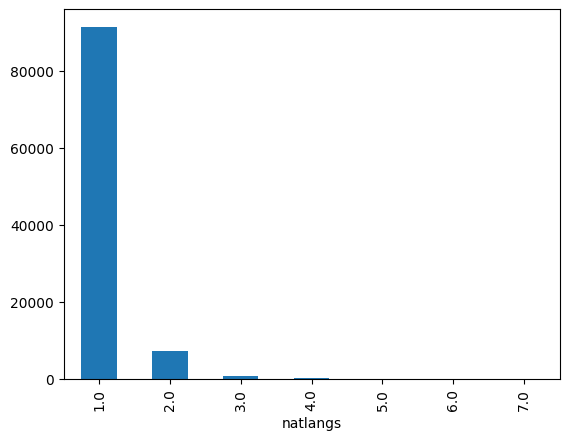

In [13]:
# Number of native languages

natlangs.value_counts().plot.bar()
natlangs.describe()

,primelangs
count,99816.000000
mean,1.323746
std,0.656772
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,10.000000


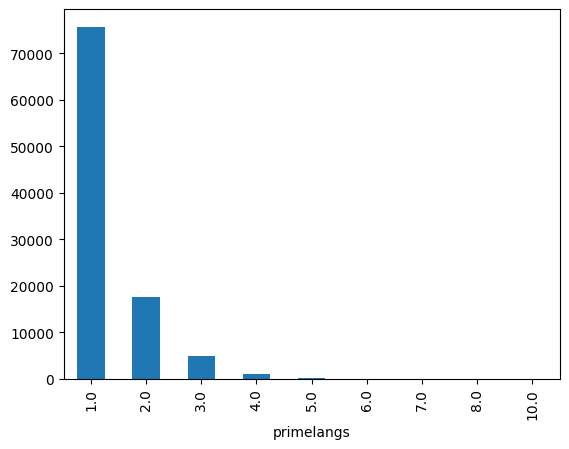

In [14]:
# Number of primary languages

primelangs.value_counts().plot.bar()
primelangs.describe()

,age
count,99999.000000
mean,29.089601
std,10.527055
min,7.000000
25%,22.000000
50%,26.000000
75%,34.000000
max,89.000000


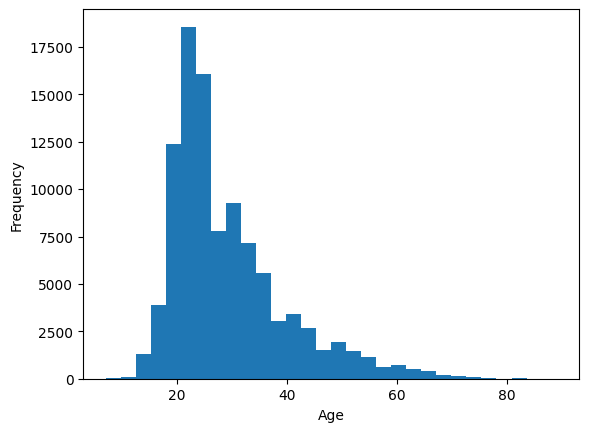

In [15]:
# Histogram of age of participants

df_lang['age'].plot.hist(xlabel='Age', bins=30)
df_lang['age'].describe()

,Eng_start
count,55079.000000
mean,8.620527
std,3.698787
min,0.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,69.000000


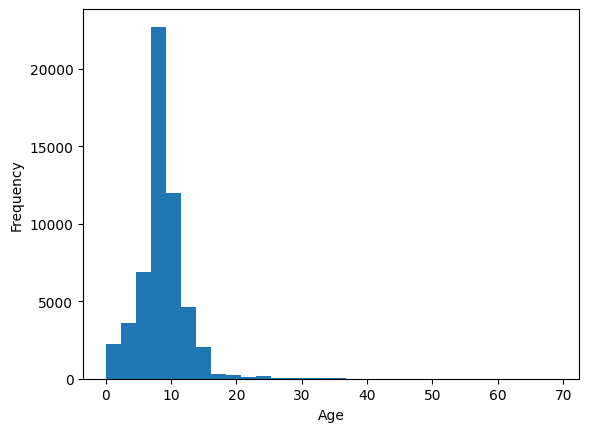

In [16]:
# Histogram of first English exposure for non-native speakers

df_lang_nonnat = df_lang[df_lang['nat_Eng'] == 0]
df_lang_nonnat['Eng_start'].plot.hist(bins=30, xlabel='Age')
df_lang_nonnat['Eng_start'].describe()

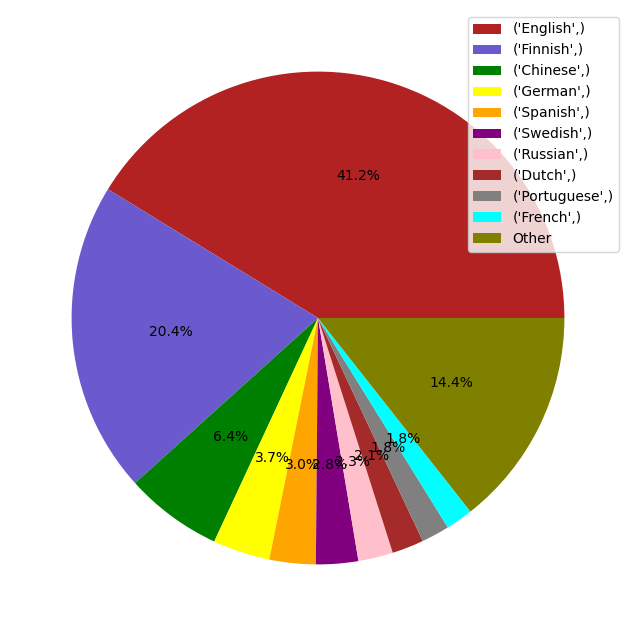

In [17]:
# Pie chart showing the percentages of non-native English speakers in the dataset

df_natlang_other = pd.Series(df_ref_natlang.value_counts().iloc[10:].sum(), index=['Other'])
df_natlang_pie = pd.concat([df_ref_natlang.value_counts().iloc[0:10], df_natlang_other])

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['firebrick', 'slateblue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'olive']

ax.pie(x=df_natlang_pie.values, labels=None, colors=colors, autopct='%1.1f%%')
plt.legend(df_natlang_pie.index, loc='best')
plt.show()

,0
q34_4,0.766268
q33_5,0.784528
q25_2,0.798538
q11_4,0.809168
q2,0.809278
...,...
q13_4,0.999340
q26_3,0.999350
q10_4,0.999390
q10_2,0.999470


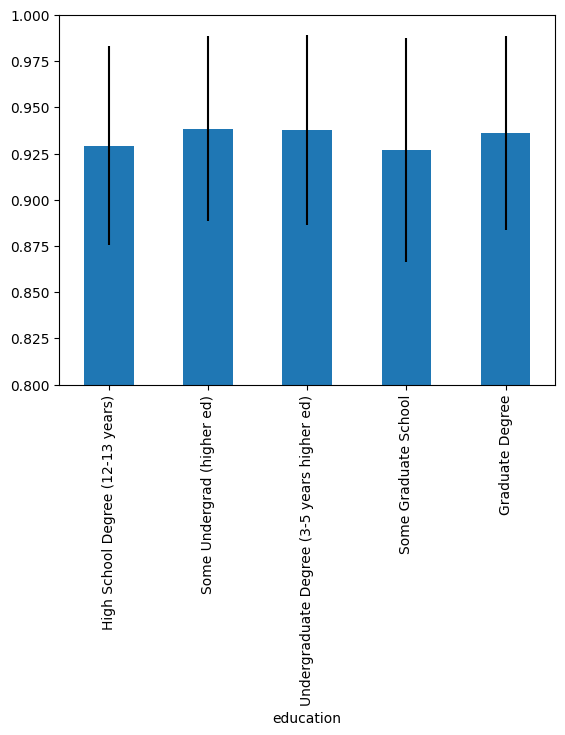

In [18]:
# Investigating whether level of education affects proficiency scores

df_lang_nonnat[['education','correct']].groupby('education').mean().reindex([
    'High School Degree (12-13 years)',
    'Some Undergrad (higher ed)',
    'Undergraduate Degree (3-5 years higher ed)',
    'Some Graduate School',
    'Graduate Degree']).plot.bar(ylim=[0.8,1],yerr=df_lang_nonnat[['education','correct']].groupby('education').std(), legend=None)

# What about specific questions? What are the most missed questions?
df_testinfo = df_lang[question_cols]
df_testinfo = df_testinfo.assign(correct=df_lang['correct'], elogit=df_lang['elogit'])

df_testinfo.mean().sort_values() # 34_4, 2, 33_5 are top 3 most missed (still over 75% though)

<Axes: xlabel='education'>

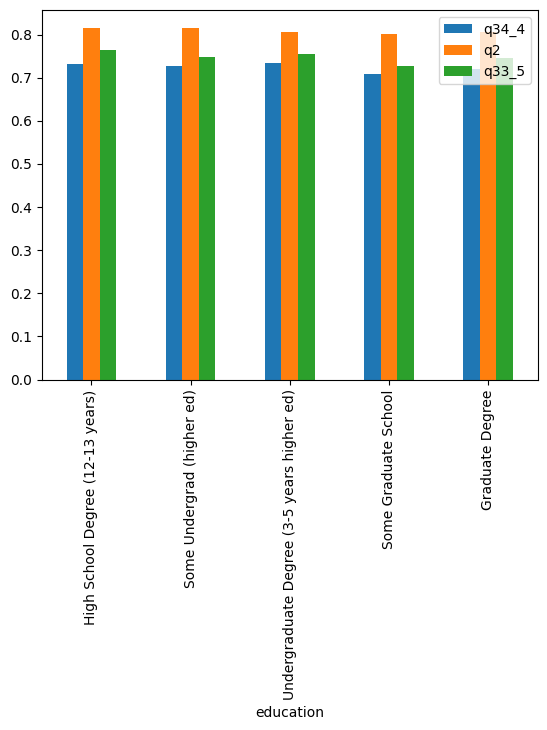

In [19]:
# Investigating whether education level affects the most missed questions

df_lang_nonnat[['education','q34_4','q2','q33_5']].groupby('education').mean().reindex([
    'High School Degree (12-13 years)',
    'Some Undergrad (higher ed)',
    'Undergraduate Degree (3-5 years higher ed)',
    'Some Graduate School',
    'Graduate Degree']).plot.bar()

# The answer: not really

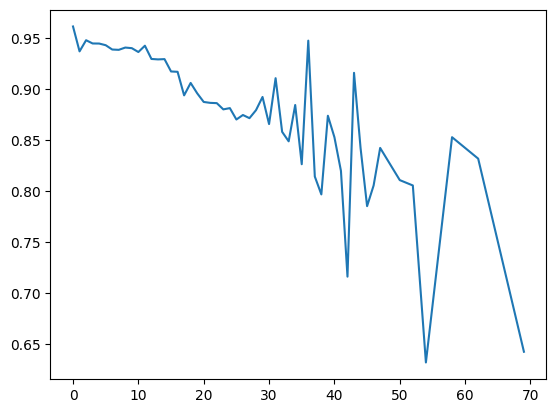

In [20]:
#test1 = df_lang_tidy.groupby(['Eng_start'])['elogit'].mean()
test2 = df_lang_tidy.groupby(['Eng_start'])['correct'].mean()
#df_lang_tidy['natlang_family'].value_counts()

#fig1 = plt.figure()
#ax1 = fig1.add_subplot(111)
#ax1.plot(test1)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(test2)

<Axes: xlabel='Eng_start', ylabel='Eng_country_yrs'>

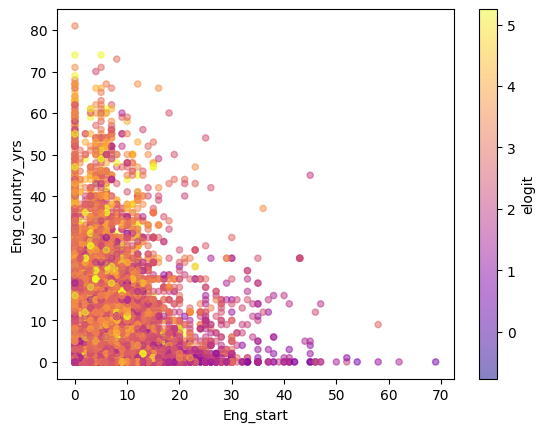

In [21]:
df_lang_tidy.plot.scatter(x='Eng_start',y='Eng_country_yrs',c='elogit',cmap='plasma',alpha=0.5)

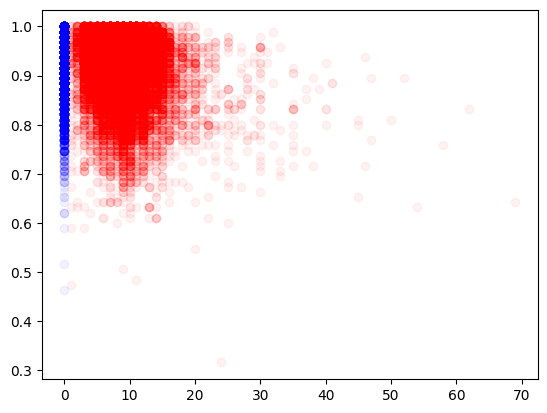

In [22]:
test2 = df_lang_tidy[df_lang_tidy['Eng_little'] == 'little'].groupby(['Eng_start'])['correct'].mean()

test3 = df_lang_tidy[df_lang_tidy['Eng_little'] == 'little']#[df_lang_tidy['Eng_start'] >= 17]
test4 = df_lang_tidy[df_lang_tidy['Eng_little'] == 'monoeng']

plt.scatter(test3['Eng_start'],test3['correct'], c='red',alpha=0.05)
plt.scatter(test4['Eng_start'],test4['correct'], c='blue',alpha=0.05)

### Conclusion

From these light analyses, we have a better understanding of the demographics of the participants included, and we began to show what relationships might exist between demographic characteristics and English proficiency. We are interested in grouping by native language along with other variables to see if patterns emerge in the scores and types of questions.

# Milestone 2

In this section, we will explore whether English proficiency varies depending on not just native language, but native language family. We may also choose to investigate whether certain syntactic features present in the native language but not in English (or vice versa) affect performance on particular questions.

In [23]:
# Change to folder containing all additional CSVs:
%cd /content/drive/MyDrive/ColabNotebooks/additionalFiles

import glob

# Glob all csv files
all_csvs = glob.glob('*.csv')

# Create base df for later merging:
df_features = pd.read_csv('future_tense.csv',sep='\t').drop(columns = ['description','value'])

# Iterate through list and merge dfs:
for file in all_csvs:
  # read in current file and slice for non-redundant columns:
  df_current = pd.read_csv(file,sep='\t')
  df_current = df_current[['name','value','description']]
  current_name = file[:-4] # get name of file for df columns

  df_current = df_current.rename(columns={'name':'name','value':current_name+'_value','description':current_name+'_description'})
  df_features = df_features.merge(df_current, on='name',how='outer')

# Drop unnecessary variables
df_features.drop(columns=['wals code', 'latitude', 'longitude', 'area'])

/content/drive/MyDrive/ColabNotebooks/additionalFiles


,name,genus,family,case_num_value,case_num_description,perfective_aspect_value,perfective_aspect_description,future_tense_value,future_tense_description,indef_art_value,indef_art_description,def_article_value,def_article_description,lang_order_value,lang_order_description,past_tense_value,past_tense_description
0,!Xóõ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,SVO,NaN,NaN
1,//Ani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,No dominant order,NaN,NaN
2,/Xam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,SVO,NaN,NaN
3,=|Hoan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,SVO,NaN,NaN
4,Aari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,"No indefinite, but definite article",3.0,Definite affix,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,Zoque (Ostuacan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,No dominant order,NaN,NaN
1473,Zulu,Bantu,Niger-Congo,1.0,No morphological case-marking,1.0,Grammatical marking,1.0,Inflectional future exists,5.0,No definite or indefinite article,5.0,No definite or indefinite article,2.0,SVO,2.0,"Present, 2-3 remoteness distinctions"
1474,Zuni,Zuni,Zuni,1.0,No morphological case-marking,2.0,No grammatical marking,2.0,No inflectional future,NaN,NaN,NaN,NaN,1.0,SOV,1.0,"Present, no remoteness distinctions"
1475,rGyalrong (Caodeng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SOV,NaN,NaN


In [24]:
# Check for differences between Mandarin and Cantonese
mandarin = df_features[df_features['name'] == 'Mandarin'].reset_index(drop=True)
cantonese = df_features[df_features['name'] == 'Cantonese'].reset_index(drop=True)
mandarin.compare(cantonese)

# Combine Mandarin and Cantonese into a single observation, Chinese
df_features.loc[df_features['name'] == 'Mandarin', 'name'] = 'Chinese'
df_features.loc[df_features['name'] == 'Cantonese', 'name'] = 'Chinese'
df_features = df_features.groupby('name').first().reset_index()

# Check
df_features[df_features['name'] == 'Chinese']

,name,wals code,latitude,longitude,genus,family,area,case_num_value,case_num_description,perfective_aspect_value,...,future_tense_value,future_tense_description,indef_art_value,indef_art_description,def_article_value,def_article_description,lang_order_value,lang_order_description,past_tense_value,past_tense_description
258,Chinese,cnt,23.0,113.0,Chinese,Sino-Tibetan,Verbal Categories,1.0,No morphological case-marking,1.0,...,2.0,No inflectional future,2.0,Indefinite word same as 'one',4.0,"No definite, but indefinite article",2.0,SVO,4.0,No past tense


In [25]:
# Merge df_features with df_lang_tidy on natlang
df_features = df_features.rename(columns={'name':'natlang'})
df_lang_tidy = df_lang_tidy.merge(df_features, how='left', on='natlang')

In the section below, we explore the distributions of some of the syntactic features of people's native languages.

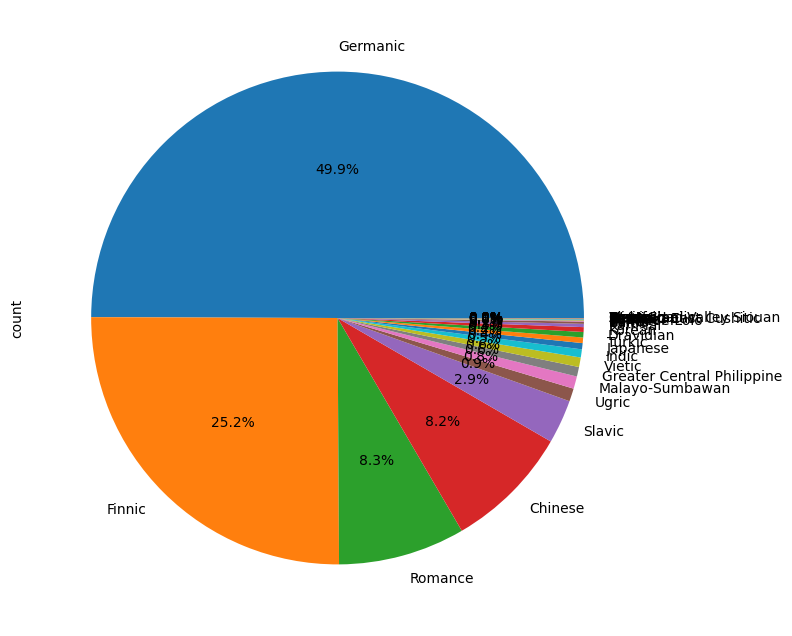

In [28]:
genus_pie = df_lang_tidy['genus'].value_counts().plot.pie(figsize=(8,8), autopct='%1.1f%%')

What are the distributions of particular languages within each language family represented here?

In [41]:
for genus in df_lang_tidy['genus'].unique():
  display(genus)
  display(df_lang_tidy[df_lang_tidy['genus'] == genus]['natlang'].value_counts())

'Germanic'

,count
natlang,
English,53742
German,6066
Swedish,5093
Afrikaans,256
Icelandic,239


'Chinese'

,count
natlang,
Chinese,10782


'Greater Central Philippine'

,count
natlang,
Tagalog,786
Cebuano,37


'Vietic'

,count
natlang,
Vietnamese,817


'Romance'

,count
natlang,
Spanish,4950
French,2959
Portuguese,2457
Romanian,522


None

,count
natlang,


'Indic'

,count
natlang,
Hindi,440
Bengali,257


'Japanese'

,count
natlang,
Japanese,532


'Slavic'

,count
natlang,
Russian,3441
Bulgarian,319


nan

,count
natlang,


'Finnic'

,count
natlang,
Finnish,32930


'Turkic'

,count
natlang,
Turkish,475


'Ugric'

,count
natlang,
Hungarian,1114


'Dravidian'

,count
natlang,
Tamil,378
Kannada,89


'Baltic'

,count
natlang,
Latvian,190


'Korean'

,count
natlang,
Korean,412


'Defoid'

,count
natlang,
Yoruba,20


'Kam-Tai'

,count
natlang,
Thai,268
Lao,11


'Lowland East Cushitic'

,count
natlang,
Somali,24


'Semitic'

,count
natlang,
Maltese,46


'Burmese-Lolo'

,count
natlang,
Burmese,47


'Malayo-Sumbawan'

,count
natlang,
Indonesian,1065


'Basque'

,count
natlang,
Basque,45


'Bantu'

,count
natlang,
Swahili,40
Zulu,8


'Ainu'

,count
natlang,
Ainu,10


'Khmer'

,count
natlang,
Khmer,23


'Kartvelian'

,count
natlang,
Georgian,24


'Oceanic'

,count
natlang,
Maori,7
Hawaiian,2


'Wolof'

,count
natlang,
Wolof,2


'Barito'

,count
natlang,
Malagasy,2


'West Chadic'

,count
natlang,
Hausa,1


'Mississippi Valley Siouan'

,count
natlang,
Lakhota,5


Let's explore some of the variation in syntactic features.

lang_order_description  natlang   
No dominant order       German        6066
                        Dutch         3643
                        Hungarian     1114
                        Frisian         56
                        Cherokee        12
                                      ... 
VSO                     Welsh          133
                        Cebuano         37
                        Hiligaynon       9
                        Maori            7
                        Hawaiian         2
Name: count, Length: 80, dtype: int64

<Axes: xlabel='lang_order_description'>

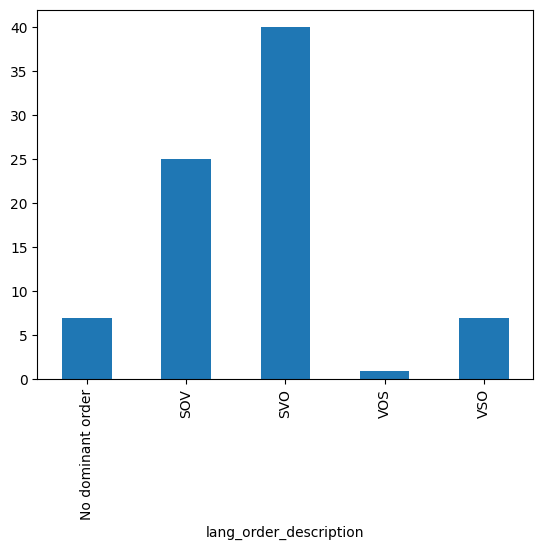

In [76]:
display(df_lang_tidy.groupby('lang_order_description')['natlang'].value_counts())
df_lang_tidy.groupby('lang_order_description')['natlang'].nunique().plot.bar() # Plot shows distribution of different word orders among languages

In [53]:
df_lang_tidy.groupby('case_num_description')['natlang'].value_counts()

case_num_description                 natlang    
10 or more cases                     Finnish        32930
                                     Hungarian       1114
                                     Estonian         417
                                     Basque            45
2 cases                              English        53742
                                     Swedish         5093
                                     Romanian         522
                                     Irish            300
                                     Urdu             193
3 cases                              Somali            24
                                     Pashto            12
4 cases                              German          6066
                                     Icelandic        239
                                     Albanian          50
5 cases                              Latvian          190
                                     Marathi           69
6-7 cases                            Russian         3441
                                     Polish          2226
                                     Turkish          475
                                     Korean           412
                                     Lithuanian       242
                                     Malayalam        103
                                     Kannada           89
                                     Georgian          24
8-9 cases                            Japanese         532
                                     Burmese           47
Exclusively borderline case-marking  Ainu              10
No morphological case-marking        Chinese        10782
                                     Spanish         4950
                                     Dutch           3643
                                     French          2959
                                     Italian         2074
                                     Indonesian      1065
                                     Vietnamese       817
                                     Tagalog          786
                                     Catalan          593
                                     Bulgarian        319
                                     Thai             268
                                     Welsh            133
                                     Swahili           40
                                     Khmer             23
                                     Yoruba            20
                                     Zulu               8
                                     Maori              7
                                     Igbo               6
                                     Lakhota            5
                                     Kinyarwanda        3
                                     Malagasy           2
                                     Navajo             2
                                     Carib              1
                                     Hausa              1
Name: count, dtype: int64

In [54]:
df_lang_tidy.groupby('perfective_aspect_description')['natlang'].value_counts()

perfective_aspect_description  natlang   
Grammatical marking            Chinese       10782
                               Spanish        4950
                               Russian        3441
                               French         2959
                               Portuguese     2457
                               Tagalog         786
                               Romanian        522
                               Turkish         475
                               Hindi           440
                               Korean          412
                               Bulgarian       319
                               Maltese          46
                               Basque           45
                               Cebuano          37
                               Georgian         24
                               Zulu              8
                               Hawaiian          2
                               Malagasy          2
No grammatical marking         English       53742
                               Finnish       32930
                               German         6066
                               Swedish        5093
                               Hungarian      1114
                               Indonesian     1065
                               Vietnamese      817
                               Japanese        532
                               Tamil           378
                               Thai            268
                               Bengali         257
                               Afrikaans       256
                               Icelandic       239
                               Latvian         190
                               Kannada          89
                               Burmese          47
                               Swahili          40
                               Somali           24
                               Khmer            23
                               Yoruba           20
                               Lao              11
                               Ainu             10
                               Maori             7
                               Lakhota           5
                               Wolof             2
                               Hausa             1
Name: count, dtype: int64

In [59]:
display(df_lang_tidy.groupby('past_tense_description')['natlang'].value_counts())
display(df_lang_tidy.groupby('future_tense_description')['natlang'].value_counts())

past_tense_description                natlang   
No past tense                         Chinese       10782
                                      Indonesian     1065
                                      Vietnamese      817
                                      Tagalog         786
                                      Thai            268
                                      Burmese          47
                                      Cebuano          37
                                      Khmer            23
                                      Yoruba           20
                                      Lao              11
                                      Ainu             10
                                      Lakhota           5
                                      Hawaiian          2
                                      Malagasy          2
                                      Hausa             1
Present, 2-3 remoteness distinctions  Zulu              8
Present, no remoteness distinctions   English       53742
                                      Finnish       32930
                                      German         6066
                                      Swedish        5093
                                      Spanish        4950
                                      Russian        3441
                                      French         2959
                                      Portuguese     2457
                                      Hungarian      1114
                                      Japanese        532
                                      Romanian        522
                                      Turkish         475
                                      Hindi           440
                                      Korean          412
                                      Tamil           378
                                      Bulgarian       319
                                      Bengali         257
                                      Afrikaans       256
                                      Icelandic       239
                                      Latvian         190
                                      Kannada          89
                                      Maltese          46
                                      Basque           45
                                      Swahili          40
                                      Georgian         24
                                      Somali           24
                                      Maori             7
                                      Wolof             2
Name: count, dtype: int64

future_tense_description    natlang   
Inflectional future exists  Spanish        4950
                            French         2959
                            Tagalog         786
                            Turkish         475
                            Hindi           440
                            Tamil           378
                            Bengali         257
                            Latvian         190
                            Kannada          89
                            Basque           45
                            Swahili          40
                            Georgian         24
                            Somali           24
                            Zulu              8
No inflectional future      English       53742
                            Finnish       32930
                            Chinese       10782
                            German         6066
                            Swedish        5093
                            Russian        3441
                            Portuguese     2457
                            Hungarian      1114
                            Indonesian     1065
                            Vietnamese      817
                            Japanese        532
                            Romanian        522
                            Korean          412
                            Bulgarian       319
                            Thai            268
                            Afrikaans       256
                            Icelandic       239
                            Burmese          47
                            Maltese          46
                            Cebuano          37
                            Khmer            23
                            Yoruba           20
                            Lao              11
                            Ainu             10
                            Maori             7
                            Lakhota           5
                            Hawaiian          2
                            Malagasy          2
                            Wolof             2
                            Hausa             1
Name: count, dtype: int64

In [58]:
display(df_lang_tidy.groupby('indef_art_description')['natlang'].value_counts())
display(df_lang_tidy.groupby('def_article_description')['natlang'].value_counts())

indef_art_description                natlang   
Indefinite word distinct from 'one'  English       53742
                                     Dutch          3643
                                     Hungarian      1114
                                     Danish          666
                                     Japanese        532
                                     Thai            268
                                     Frisian          56
                                     Albanian         50
                                     Cebuano          37
                                     Maori             7
                                     Lakhota           5
                                     Hawaiian          2
                                     Wolof             2
                                     Hausa             1
                                     Tajik             1
Indefinite word same as 'one'        Chinese       10782
                                     German         6066
                                     Swedish        5093
                                     Spanish        4950
                                     French         2959
                                     Portuguese     2457
                                     Italian        2074
                                     Norwegian      1119
                                     Catalan         593
                                     Romanian        522
                                     Turkish         475
                                     Latvian         190
                                     Kannada          89
                                     Basque           45
                                     Zarma             1
No definite or indefinite article    Finnish       32930
                                     Russian        3441
                                     Polish         2226
                                     Hindi           440
                                     Estonian        417
                                     Korean          412
                                     Czech           393
                                     Ukrainian       253
                                     Lithuanian      242
                                     Urdu            193
                                     Marathi          69
                                     Burmese          47
                                     Yoruba           20
                                     Cherokee         12
                                     Pashto           12
                                     Lao              11
                                     Zulu              8
                                     Tatar             7
                                     Ndebele           1
No indefinite, but definite article  Indonesian     1065
                                     Irish           300
                                     Icelandic       239
                                     Welsh           133
                                     Somali           24
                                     Malagasy          2
Name: count, dtype: int64

def_article_description                      natlang   
Definite affix                               Swedish        5093
                                             Norwegian      1119
                                             Danish          666
                                             Romanian        522
                                             Icelandic       239
                                             Albanian         50
                                             Somali           24
                                             Oriya             7
Definite word distinct from demonstrative    English       53742
                                             German         6066
                                             Spanish        4950
                                             Dutch          3643
                                             French         2959
                                             Portuguese     2457
                                             Italian        2074
                                             Hungarian      1114
                                             Vietnamese      817
                                             Bulgarian       319
                                             Irish           300
                                             Welsh           133
                                             Frisian          56
                                             Basque           45
                                             Macedonian       43
                                             Khmer            23
                                             Maori             7
                                             Lakhota           5
                                             Hawaiian          2
                                             Malagasy          2
                                             Wolof             2
                                             Hausa             1
                                             Zarma             1
Demonstrative word used as definite article  Indonesian     1065
                                             Latvian         190
                                             Swahili          40
No definite or indefinite article            Finnish       32930
                                             Russian        3441
                                             Polish         2226
                                             Hindi           440
                                             Estonian        417
                                             Korean          412
                                             Czech           393
                                             Ukrainian       253
                                             Lithuanian      242
                                             Urdu            193
                                             Marathi          69
                                             Burmese          47
                                             Yoruba           20
                                             Cherokee         12
                                             Pashto           12
                                             Lao              11
                                             Zulu              8
                                             Tatar             7
                                             Ndebele           1
No definite, but indefinite article          Chinese       10782
                                             Japanese        532
                                             Turkish         475
                                             Thai            268
                                             Cebuano          37
                                             Tajik             1
Name: count, dtype: int64

Now that we have a better idea about the distribution of these syntactic features across languages and native speakers in the dataset, let's sort the languages by their distance from English based on these features.